# Libraries

In [2]:
import pandas as pd
import wbgapi as wb
import os
import matplotlib.pyplot as plt

# Data preparation

In [3]:
# Create a data folder
try:
    os.mkdir('data')
except FileExistsError:
    pass

### Data loading

In [5]:
wb.series.info(q='education')

id,value
FX.OWN.TOTL.PL.ZS,"Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)"
FX.OWN.TOTL.SO.ZS,"Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+)"
NY.ADJ.AEDU.CD,Adjusted savings: education expenditure (current US$)
NY.ADJ.AEDU.GN.ZS,Adjusted savings: education expenditure (% of GNI)
SE.COM.DURS,"Compulsory education, duration (years)"
SE.PRE.DURS,"Preprimary education, duration (years)"
SE.PRE.TCAQ.FE.ZS,"Trained teachers in preprimary education, female (% of female teachers)"
SE.PRE.TCAQ.MA.ZS,"Trained teachers in preprimary education, male (% of male teachers)"
SE.PRE.TCAQ.ZS,Trained teachers in preprimary education (% of total teachers)
SE.PRM.CUAT.FE.ZS,"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)"


In [6]:
# Select series to get
series = {'NY.GDP.PCAP.PP.CD': 'gdp_per_capita_ppp', 'SP.DYN.LE00.IN': 'life_expectancy', 'SL.UEM.TOTL.ZS': 'unemployment', 'NV.AGR.TOTL.ZS': 'agriculture_%_GDP', \
         'GC.TAX.TOTL.GD.ZS': 'tax_revenue_%_GDP', 'NE.EXP.GNFS.ZS': 'exports_%_GDP', 'GC.XPN.TOTL.GD.ZS': 'public_expense_%_GDP', 'SE.XPD.TOTL.GD.ZS': 'education_expense_%_GDP'}

# Get the last 50 years of the series data and store it
## IMPORTANT: MAY TAKE UP TO 3 MINUTES TO LOAD
df = wb.data.DataFrame(list(series.keys()), mrv=50)

### Data cleaning

In [7]:
df.isna().sum()

YR1971    1605
YR1972    1532
YR1973    1512
YR1974    1509
YR1975    1486
YR1976    1481
YR1977    1472
YR1978    1471
YR1979    1464
YR1980    1424
YR1981    1420
YR1982    1411
YR1983    1414
YR1984    1413
YR1985    1411
YR1986    1400
YR1987    1400
YR1988    1397
YR1989    1382
YR1990    1102
YR1991     850
YR1992     840
YR1993     834
YR1994     799
YR1995     715
YR1996     718
YR1997     752
YR1998     679
YR1999     624
YR2000     607
YR2001     600
YR2002     567
YR2003     580
YR2004     546
YR2005     560
YR2006     555
YR2007     556
YR2008     503
YR2009     498
YR2010     457
YR2011     445
YR2012     444
YR2013     432
YR2014     418
YR2015     396
YR2016     408
YR2017     407
YR2018     439
YR2019     561
YR2020    1254
dtype: int64

In [8]:
# Transform the dataframe to long format
df_long = pd.melt(df.reset_index(), id_vars=['economy', 'series'], var_name='year')

# Get series into columns
df_clean = df_long.pivot_table(index=['economy', 'year'], columns=['series'], values='value').reset_index()

# Fix 'year' column
df_clean['year'] = df_clean['year'].str[2:]

# Rename series column
df_clean = df_clean.rename(columns=series)

# Fill out missing values with the mean of the country value
for i in ['unemployment', 'gdp_per_capita_ppp', 'life_expectancy']:
    df_clean[i] = df_clean.groupby("economy")[i].transform(lambda x: x.fillna(x.mean()))

# Drop rows with missing values
df_clean = df_clean.dropna()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2449 entries, 77 to 12592
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   economy                  2449 non-null   object 
 1   year                     2449 non-null   object 
 2   tax_revenue_%_GDP        2449 non-null   float64
 3   public_expense_%_GDP     2449 non-null   float64
 4   exports_%_GDP            2449 non-null   float64
 5   agriculture_%_GDP        2449 non-null   float64
 6   gdp_per_capita_ppp       2449 non-null   float64
 7   education_expense_%_GDP  2449 non-null   float64
 8   unemployment             2449 non-null   float64
 9   life_expectancy          2449 non-null   float64
dtypes: float64(8), object(2)
memory usage: 210.5+ KB


## Machine learning

In [9]:
df_ml = df_clean.drop(['economy', 'year'], axis=1)

In [19]:
X = df_ml.drop(['gdp_per_capita_ppp'], axis=1).values
y = df_ml['gdp_per_capita_ppp'].values

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

reg.score(X_test, y_test)


0.6046442303679432

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()

cv_results = cross_val_score(reg, X_train, y_train, cv=5)

cv_results

array([0.61865283, 0.62124275, 0.62794041, 0.62988901, 0.5839768 ])

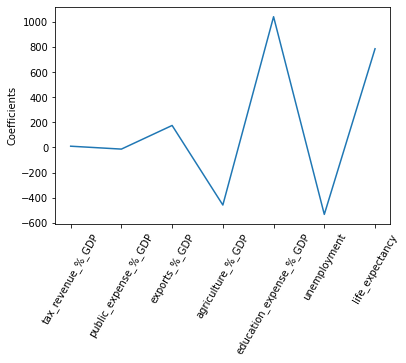

In [22]:
from sklearn.linear_model import Lasso

names = df_ml.drop('gdp_per_capita_ppp', axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X, y).coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')

plt.show()